## Домашнее задание 2

**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_st_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате `ipynb`.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков можно использовать без ограничений.**

**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $\LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b>:
* Задача 1 - 50 баллов

<b><font color="orange">Сложная часть</font></b>:
* Задача 2 - 30 баллов


-----

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white')

%matplotlib inline

### Задача 1

В этой задаче нужно визуализировать *центральную предельную теорему*.



Пусть $\xi_1, ..., \xi_n$ — независимые случайные величины из распределения $Exp(\lambda)$. Согласно центральной предельной теореме выполнена сходимость $$Z_n = \frac{X_n - \mathsf{E}X_n}{\sqrt{\mathsf{D}X_n}} \stackrel{d}{\to} \mathcal{N}(0, 1)$$ где $X_n = \sum\limits_{i=1}^n \xi_i$. Вам нужно убедиться в этом, сгенерировав множество наборов случайных величин и посчитав по каждому из наборов величину $Z_n$ в зависимости от размера набора.

Сгенерируйте 500 наборов случайных величин $\xi_1^j, ..., \xi_{300}^j$ из распределения $Exp(1)$.

In [2]:
size = 300  # размер выборки
samples_count = 500  # количество выборок
sample = sps.expon(0, 1).rvs(size = (samples_count, size))

По каждому из них посчитайте сумму $X_{jn} = \sum\limits_{i=1}^n \xi_i^j$ для $1 \leqslant n \leqslant 300$, то есть сумма первых $n$ величин $j$-го набора.

In [6]:
def x_jn(j):
    summ2 = sample[j].cumsum() # берем j-ю выборку, после получаем последовательность частичных сумм
    return summ2

Для этого среднего посчитайте величину $Z_{jn} = \frac{X_{jn} - \mathsf{E}X_{jn}}{\sqrt{\mathsf{D}X_{jn}}}$.

*Подсказка: можно воспользоваться возможностями библиотеки `numpy`.*

Характеристики показательного распределения: $E = 1/\lambda$, $D = 1/\lambda^2$. В нашем случае $\lambda = 1$.Тогда $Z_{jn} = \frac{X_{jn} - \mathsf{E}X_{j}n}{\sqrt{\mathsf{D}X_{j}}n}$

In [7]:
def z_jn(j):
    z = np.zeros(300)
    for i in range(0, 300):
        z[i] = (x_jn(j)[i-1] - i)/(i)**0.5
    return z

Для каждого $j$ нанесите на один график зависимость $Z_{jn}$ от $n$ с помощью `plt.plot`. Каждая кривая должна быть нарисована *одним цветом* с прозрачностью `alpha=0.05`. Сходятся ли значения $Z_{jn}$ к какой-либо константе?

<ipython-input-7-d5fe9fdeea84>:4: RuntimeWarning: divide by zero encountered in scalar divide
  z[i] = (x_jn(j)[i-1] - i)/(i)**0.5


Text(0.5, 0, '$n$')

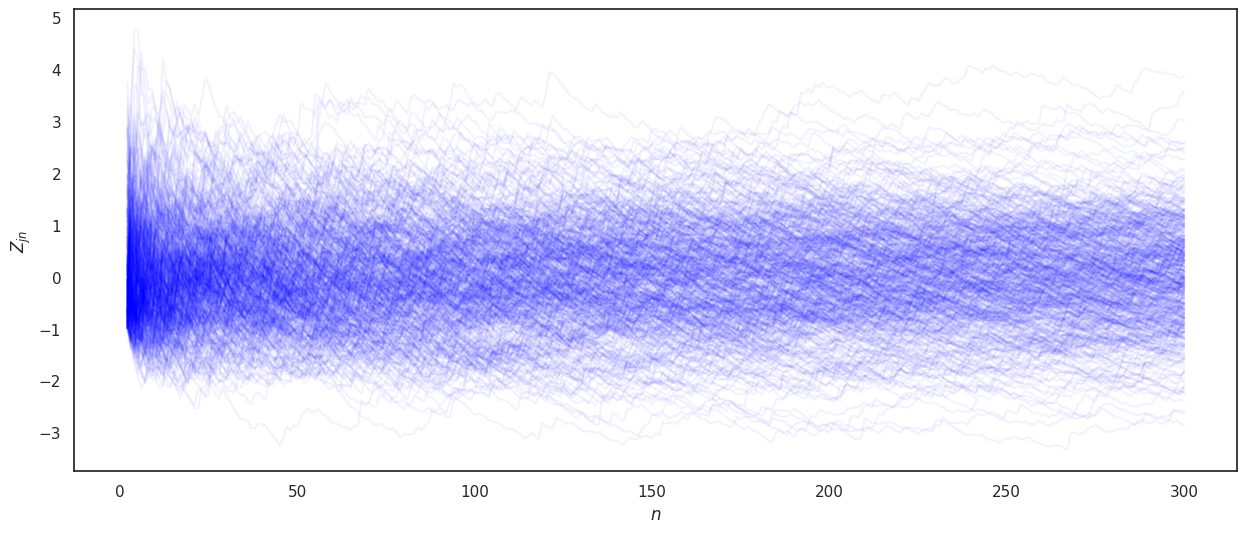

In [8]:
plt.figure(figsize = (15, 6))

for j in range(500):
    x = np.linspace(1, 300, 300)
    plt.plot(x, z_jn(j), color = 'blue', alpha = 0.05)

plt.ylabel(r'$Z_{jn}$')
plt.xlabel(r'$n$')

Значения $Z_{jn}$ не сходятся к константе (в малой окрестности 0 линии гуще, но все же о сходимости говорить трудно)


Для $n=300$ по набору случайных величин $Z_{1,300}, ..., Z_{500,300}$ постройте гистограмму. Похожа ли она на плотность распределения $\mathcal{N}(0, 1)$, которую тоже постройте на том же графике? Не забудьте сделать легенду (подписи на графиках, см. семинар и туториалы).

<ipython-input-7-d5fe9fdeea84>:4: RuntimeWarning: divide by zero encountered in scalar divide
  z[i] = (x_jn(j)[i-1] - i)/(i)**0.5


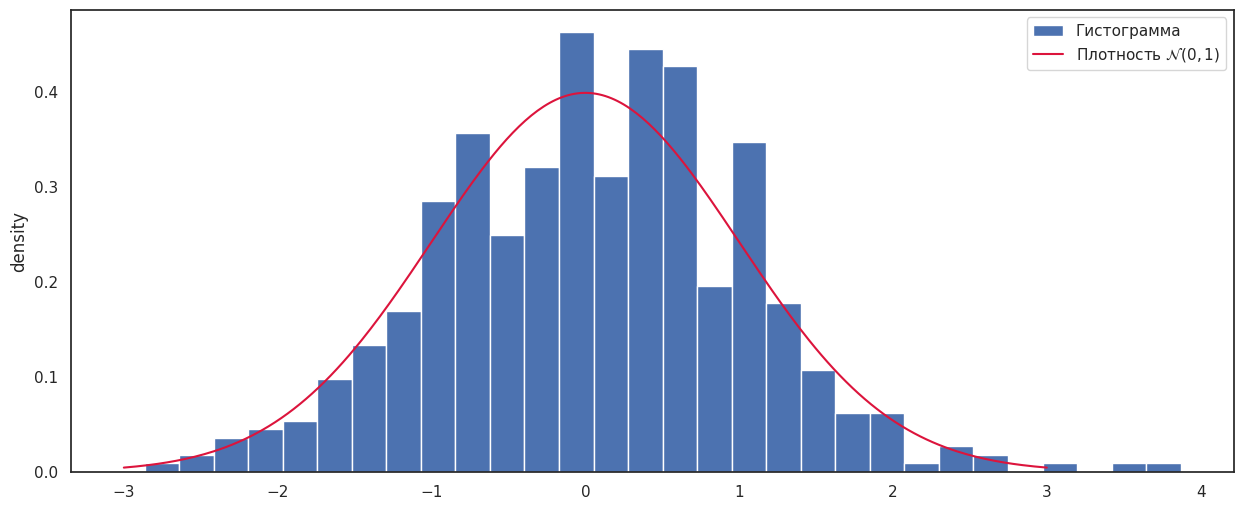

In [11]:
plt.figure(figsize = (15, 6))

sampleZ = np.array([z_jn(j)[299] for j in range(samples_count)])

plt.hist(sampleZ, bins = 30, label = 'Гистограмма', density = True) # density необходим для нормировки, чтобы площадь гистограммы равнялась 1

grid = np.linspace(-3, 3, 300)
plt.plot(grid, sps.norm.pdf(grid), color = 'crimson', label = 'Плотность $\\mathcal{N}(0,1)$')

plt.ylabel('density')
plt.legend()

Сделайте вывод о смысле центральной предельной теоремы.


### Задача 2


Выполните те же действия для распределения $Pois(1)$.


Сделайте вывод о смысле центральной предельной теоремы. Подтверждают ли сделанные эксперименты теоретические свойства?

In [12]:
#пуассоновское распределение
size2 = 300  # размер выборки
samples_count2 = 500 # количество выборок
sample3 = sps.poisson(mu = 1).rvs(size= (samples_count, size))

Распределение $P (\lambda)$, $\lambda = 1$, а значит $EX = DX = \lambda = 1$.

<ipython-input-7-d5fe9fdeea84>:4: RuntimeWarning: divide by zero encountered in scalar divide
  z[i] = (x_jn(j)[i-1] - i)/(i)**0.5


Text(0.5, 0, '$n$')

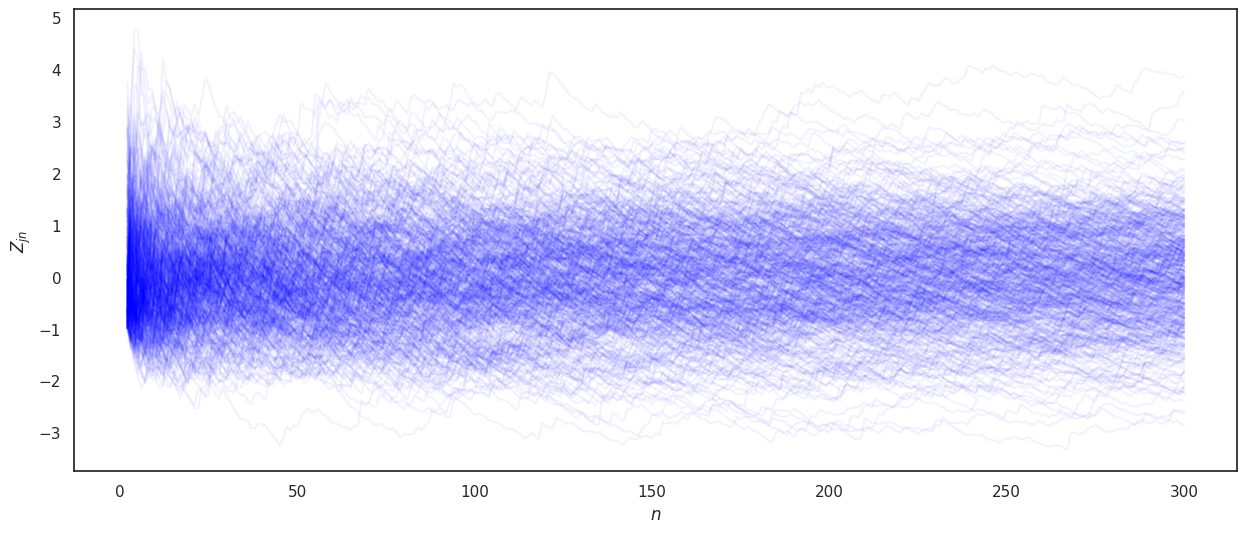

In [14]:
plt.figure(figsize = (15, 6))

for j in range(500):
    x = np.linspace(1, 300, 300)
    plt.plot(x, z_jn(j), color = 'blue', alpha = 0.05)

plt.ylabel(r'$Z_{jn}$')
plt.xlabel(r'$n$')


<ipython-input-7-d5fe9fdeea84>:4: RuntimeWarning: divide by zero encountered in scalar divide
  z[i] = (x_jn(j)[i-1] - i)/(i)**0.5


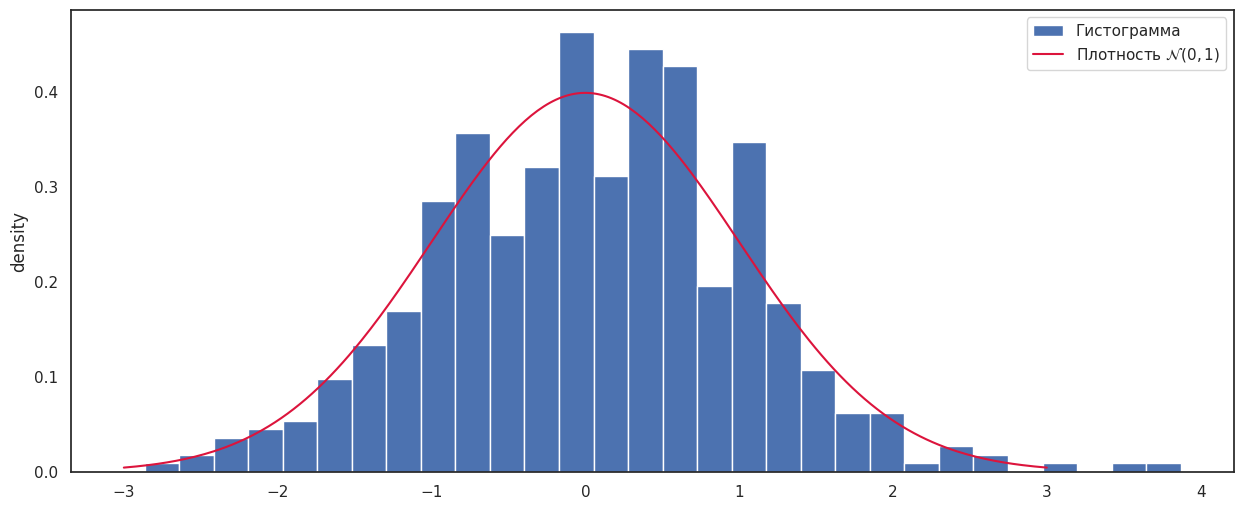

In [15]:
plt.figure(figsize = (15, 6))

sampleZ = np.array([z_jn(j)[299] for j in range(samples_count)])

plt.hist(sampleZ, bins = 30, label = 'Гистограмма', density = True) # density необходим для нормировки, чтобы площадь гистограммы равнялась 1

grid = np.linspace(-3, 3, 300)
plt.plot(grid, sps.norm.pdf(grid), color = 'crimson', label = 'Плотность $\\mathcal{N}(0,1)$')

plt.ylabel('density')
plt.legend()

Центральная предельная теорема говорит о том, что сумма большого количества независимых и одинаково распределенных случайных величин, нормализованная на корень их числа, стремится к стандартному нормальному распределению. Наши задачи это подтверждают на примере сравнения гистограммы для n=300 и плотности распределения для нормального распределения